# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


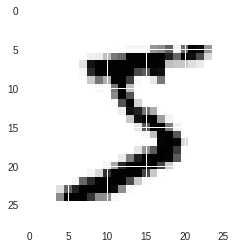

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 22))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          48410     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 50,340
Trainable params: 50,340
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.1642 - acc: 0.9518
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0620 - acc: 0.9811
Epoch 3/10
 4192/60000 [=>............................] - ETA: 15s - loss: 0.0491 - acc: 0.9840

60000/60000 [==============================] - 17s 285us/step - loss: 0.0431 - acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0342 - acc: 0.9895
Epoch 5/10
10144/60000 [====>.........................] - ETA: 14s - loss: 0.0211 - acc: 0.9933

60000/60000 [==============================] - 17s 285us/step - loss: 0.0266 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0223 - acc: 0.9927
Epoch 7/10
11680/60000 [====>.........................] - ETA: 13s - loss: 0.0141 - acc: 0.9959

60000/60000 [==============================] - 17s 286us/step - loss: 0.0169 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0146 - acc: 0.9951
Epoch 9/10
12256/60000 [=====>........................] - ETA: 13s - loss: 0.0072 - acc: 0.9976

60000/60000 [==============================] - 17s 288us/step - loss: 0.0121 - acc: 0.9959
Epoch 10/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0098 - acc: 0.9969


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.05289723569912567, 0.9872]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[9.22032186e-20 3.63918854e-20 1.33554571e-13 7.24717282e-08
  3.34911735e-25 7.87739648e-18 1.63932884e-27 9.99999881e-01
  3.52035415e-12 3.43652690e-10]
 [1.69948677e-16 1.11888255e-13 1.00000000e+00 1.63722259e-20
  5.13414860e-22 3.00139407e-27 2.56749493e-14 1.09766383e-25
  2.05924530e-15 3.82860320e-20]
 [3.48133848e-11 9.99999285e-01 1.26188582e-09 6.15798645e-12
  1.10195032e-07 7.11991854e-10 6.10815634e-11 2.27345581e-07
  2.87056167e-07 1.17615366e-08]
 [1.00000000e+00 1.21931777e-23 4.01846612e-10 1.59729611e-13
  4.47259878e-13 1.19046630e-11 3.80261211e-10 2.26026829e-14
  2.83148049e-12 2.36668185e-10]
 [5.27261394e-13 1.39041292e-16 7.02418970e-15 4.78742969e-16
  1.00000000e+00 1.47394617e-15 2.98462859e-15 1.13117701e-11
  4.16303936e-10 4.45234463e-08]
 [1.27666367e-11 9.99974012e-01 2.70068856e-10 2.08424727e-12
  1.52664768e-06 2.02614991e-11 1.42349262e-12 2.35632997e-05
  9.32794819e-07 3.07080903e-08]
 [6.78696418e-26 3.05255061e-18 6.24309293e-14 5.47461878e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

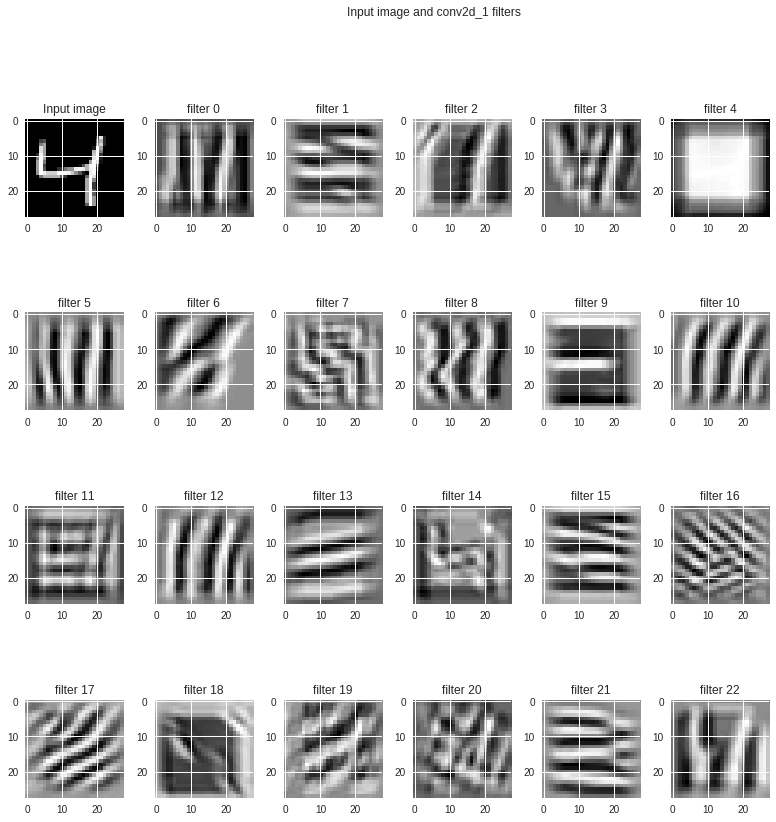

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()